In [180]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift,  AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [181]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/nimoru7/schulich_data_science/refs/heads/main/Customer_Data.csv')

# **Data Exploration and Cleaning**

In [182]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [183]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [185]:
# Check for nulls
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [186]:
# CREDIT_LIMIT has one null so we will just drop it
df = df.dropna(subset=['CREDIT_LIMIT'])

In [187]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Look into MINIMUM_PAYMENTS column to see which imputation method would be best

In [188]:
print(df['MINIMUM_PAYMENTS'].describe())


count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [189]:
# Check the skewness
print("Skewness:", df['MINIMUM_PAYMENTS'].skew())

Skewness: 13.622193089492017


In [190]:
# Visualize distribution

Text(0.5, 1.0, 'MINIMUM_PAYMENTS Boxplot')

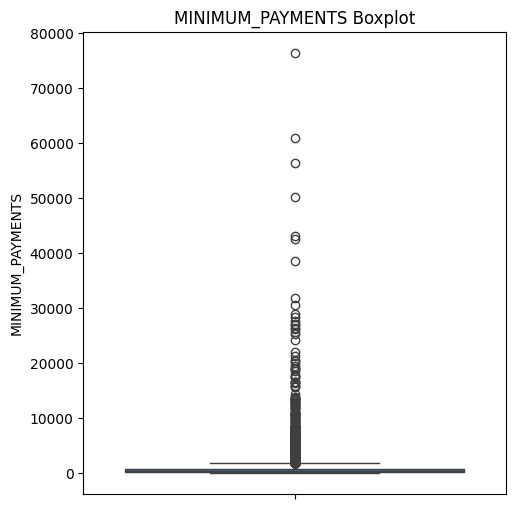

In [191]:
plt.figure(figsize=(12, 6))

# Boxplot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 1)
sns.boxplot(y=df['MINIMUM_PAYMENTS'])
plt.title('MINIMUM_PAYMENTS Boxplot')

Given there are extreme outliers and that it has high skewness, we will impute using median

In [192]:
# Fill missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-192-4695b74fca84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [193]:
# Initialize KNN Imputer
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)

# Fill in missing values
# df['MINIMUM_PAYMENTS'] = knn_imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [194]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [195]:
# Check for duplicates
df.duplicated ().sum ()

0

In [196]:
df.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [197]:
# Since CUST_ID is categorical and used to identify rows, we will convert it to an index
df.set_index('CUST_ID', inplace=True)

In [198]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000        312.452292          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [199]:
# Correlation matrix
correlation_matrix = df.corr()

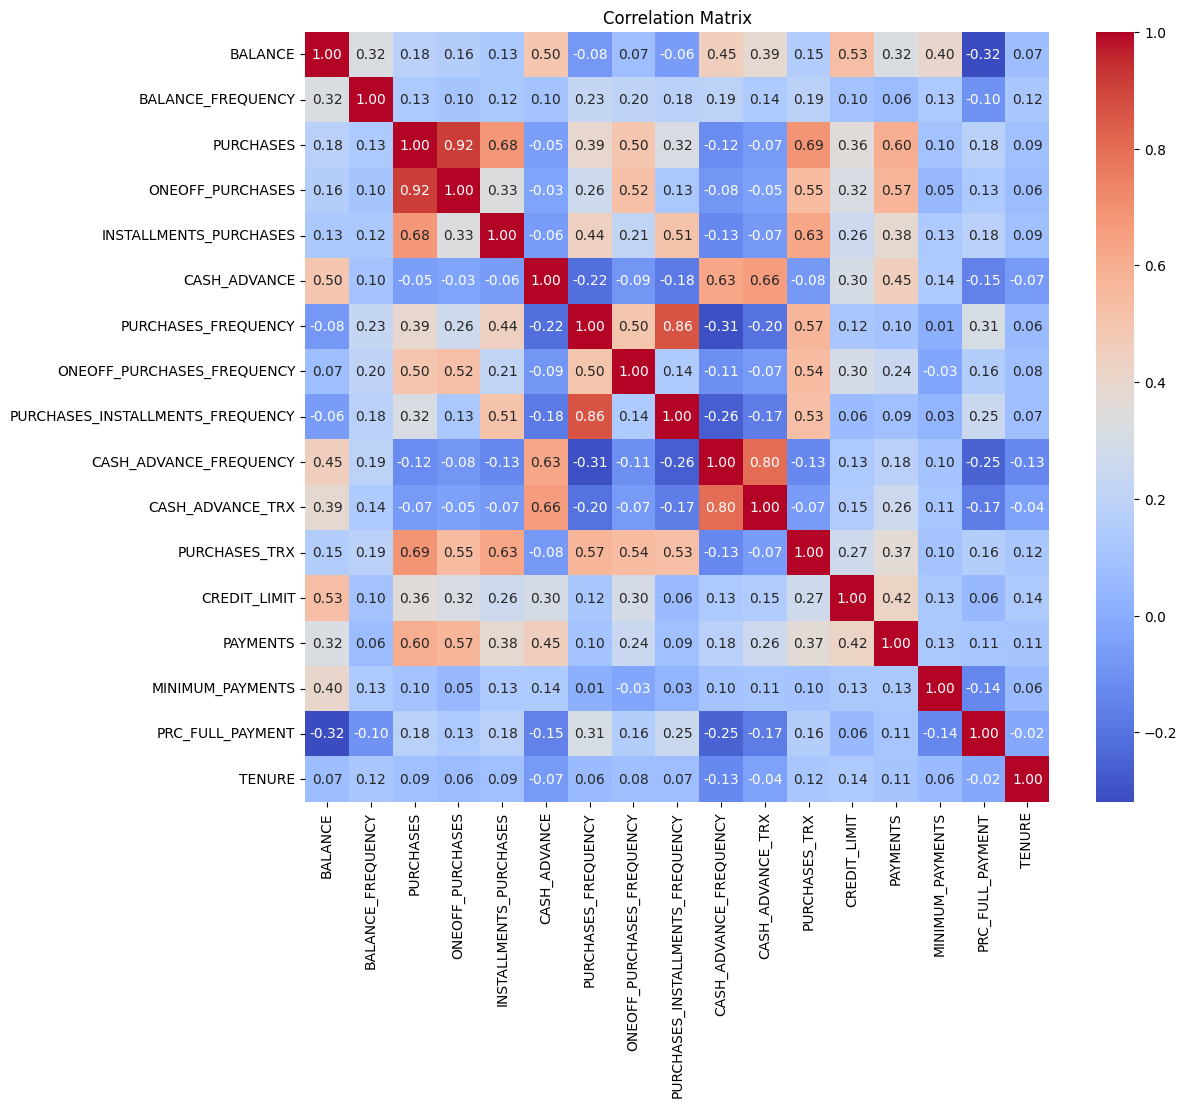

In [200]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Outliers

In [201]:
# Count outliers in each column using IQR

def count_outliers_iqr(df):
  outlier_counts = {}
  for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

  return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Count
outlier_counts_df = count_outliers_iqr(df)
outlier_counts_df

Outlier Count
BALANCE                                     695
BALANCE_FREQUENCY                          1492
PURCHASES                                   808
ONEOFF_PURCHASES                           1013
INSTALLMENTS_PURCHASES                      867
CASH_ADVANCE                               1030
PURCHASES_FREQUENCY                           0
ONEOFF_PURCHASES_FREQUENCY                  782
PURCHASES_INSTALLMENTS_FREQUENCY              0
CASH_ADVANCE_FREQUENCY                      525
CASH_ADVANCE_TRX                            804
PURCHASES_TRX                               766
CREDIT_LIMIT                                248
PAYMENTS                                    808
MINIMUM_PAYMENTS                            909
PRC_FULL_PAYMENT                           1474
TENURE                                     1365

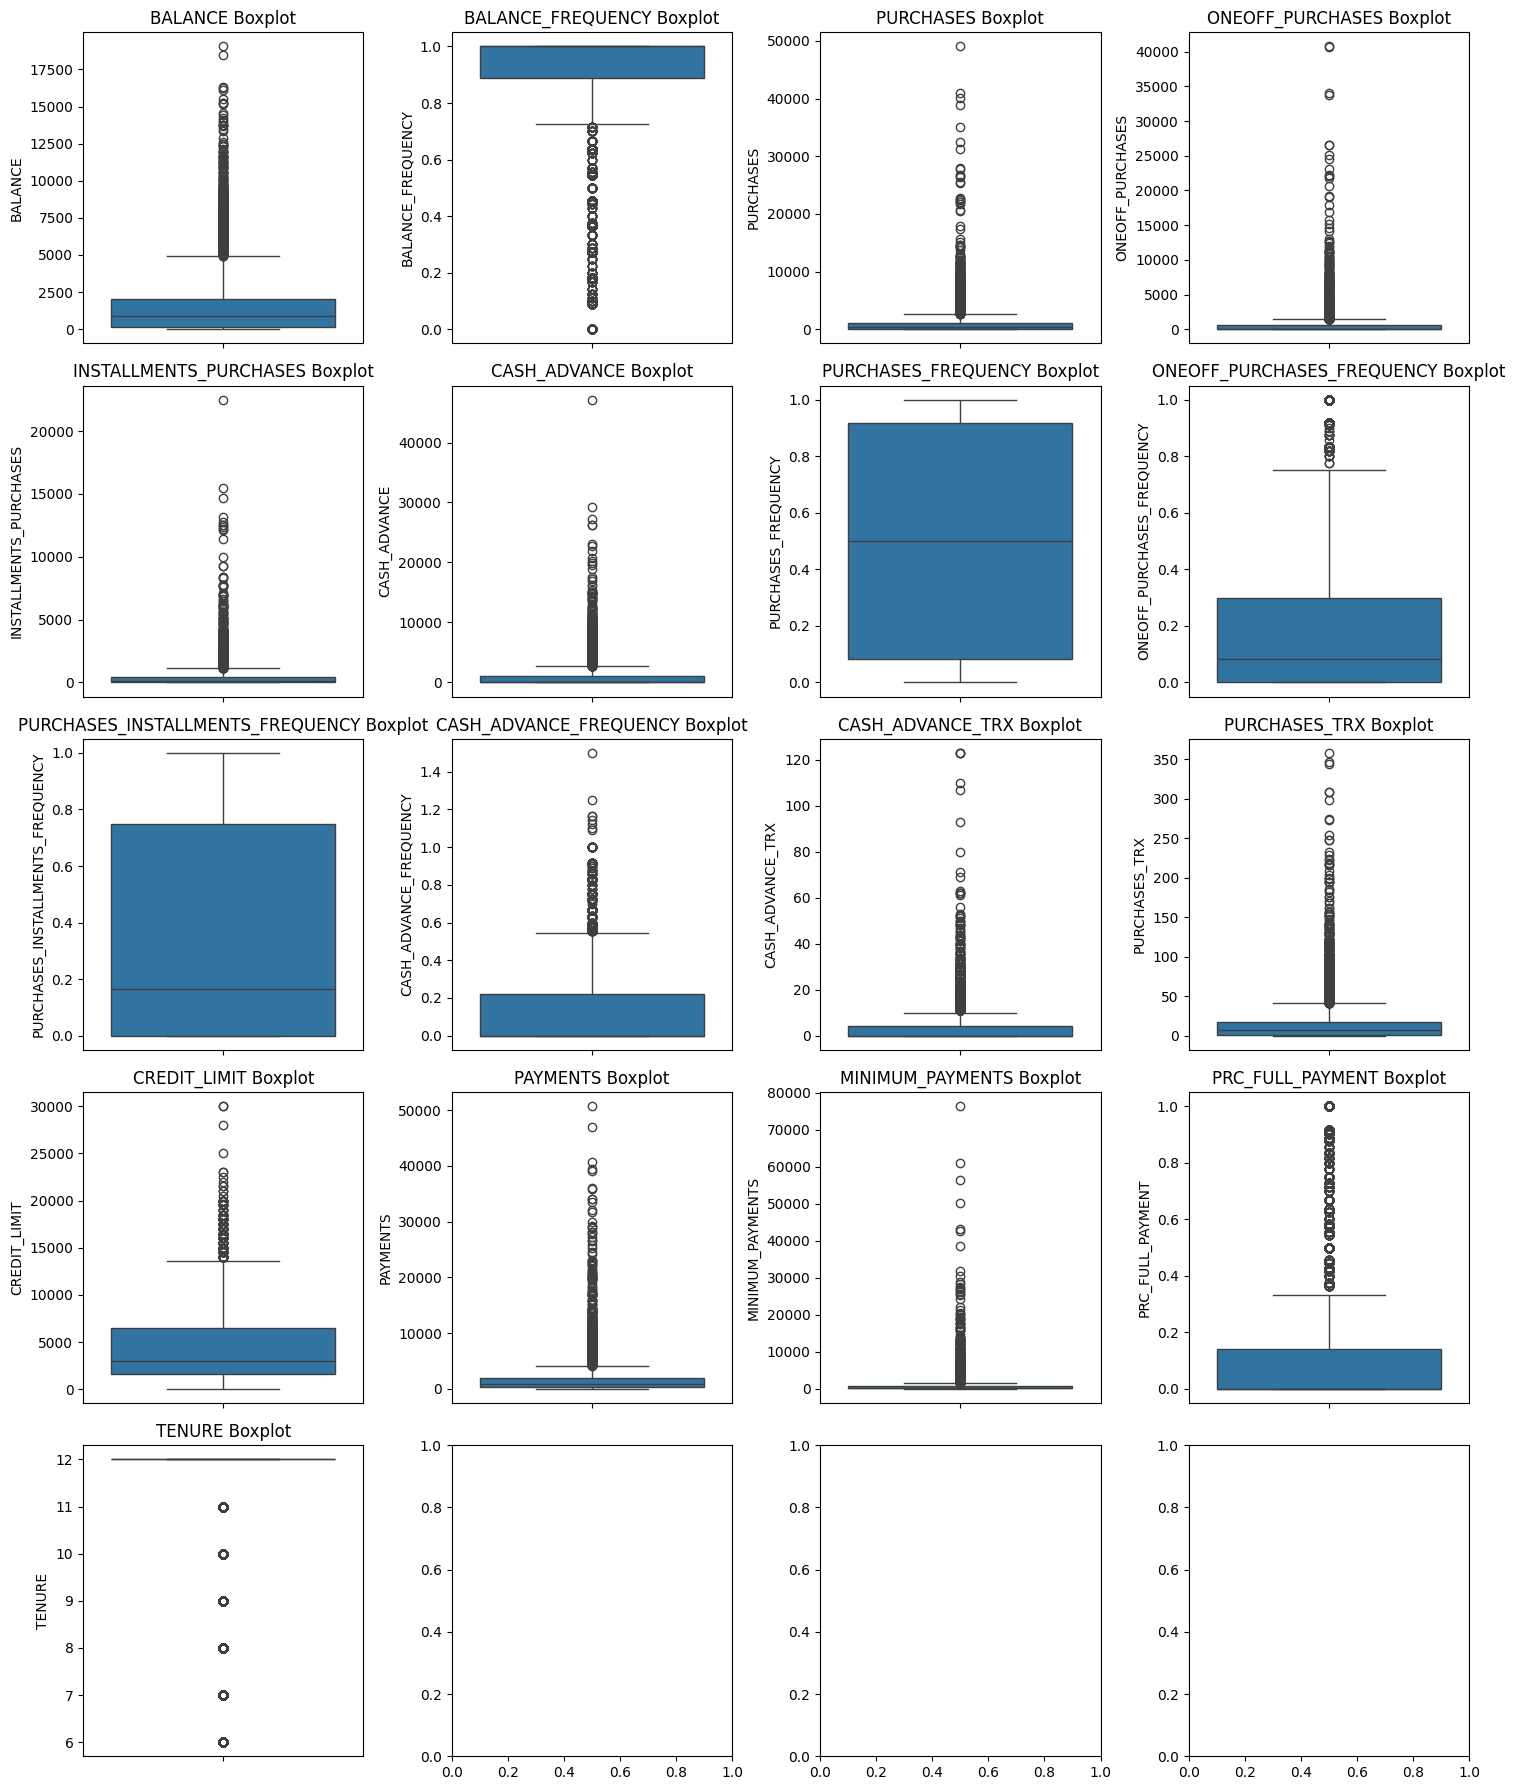

In [202]:
# Boxplots to visualize outliers
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

There are lots of outliers, we will have to winsorize

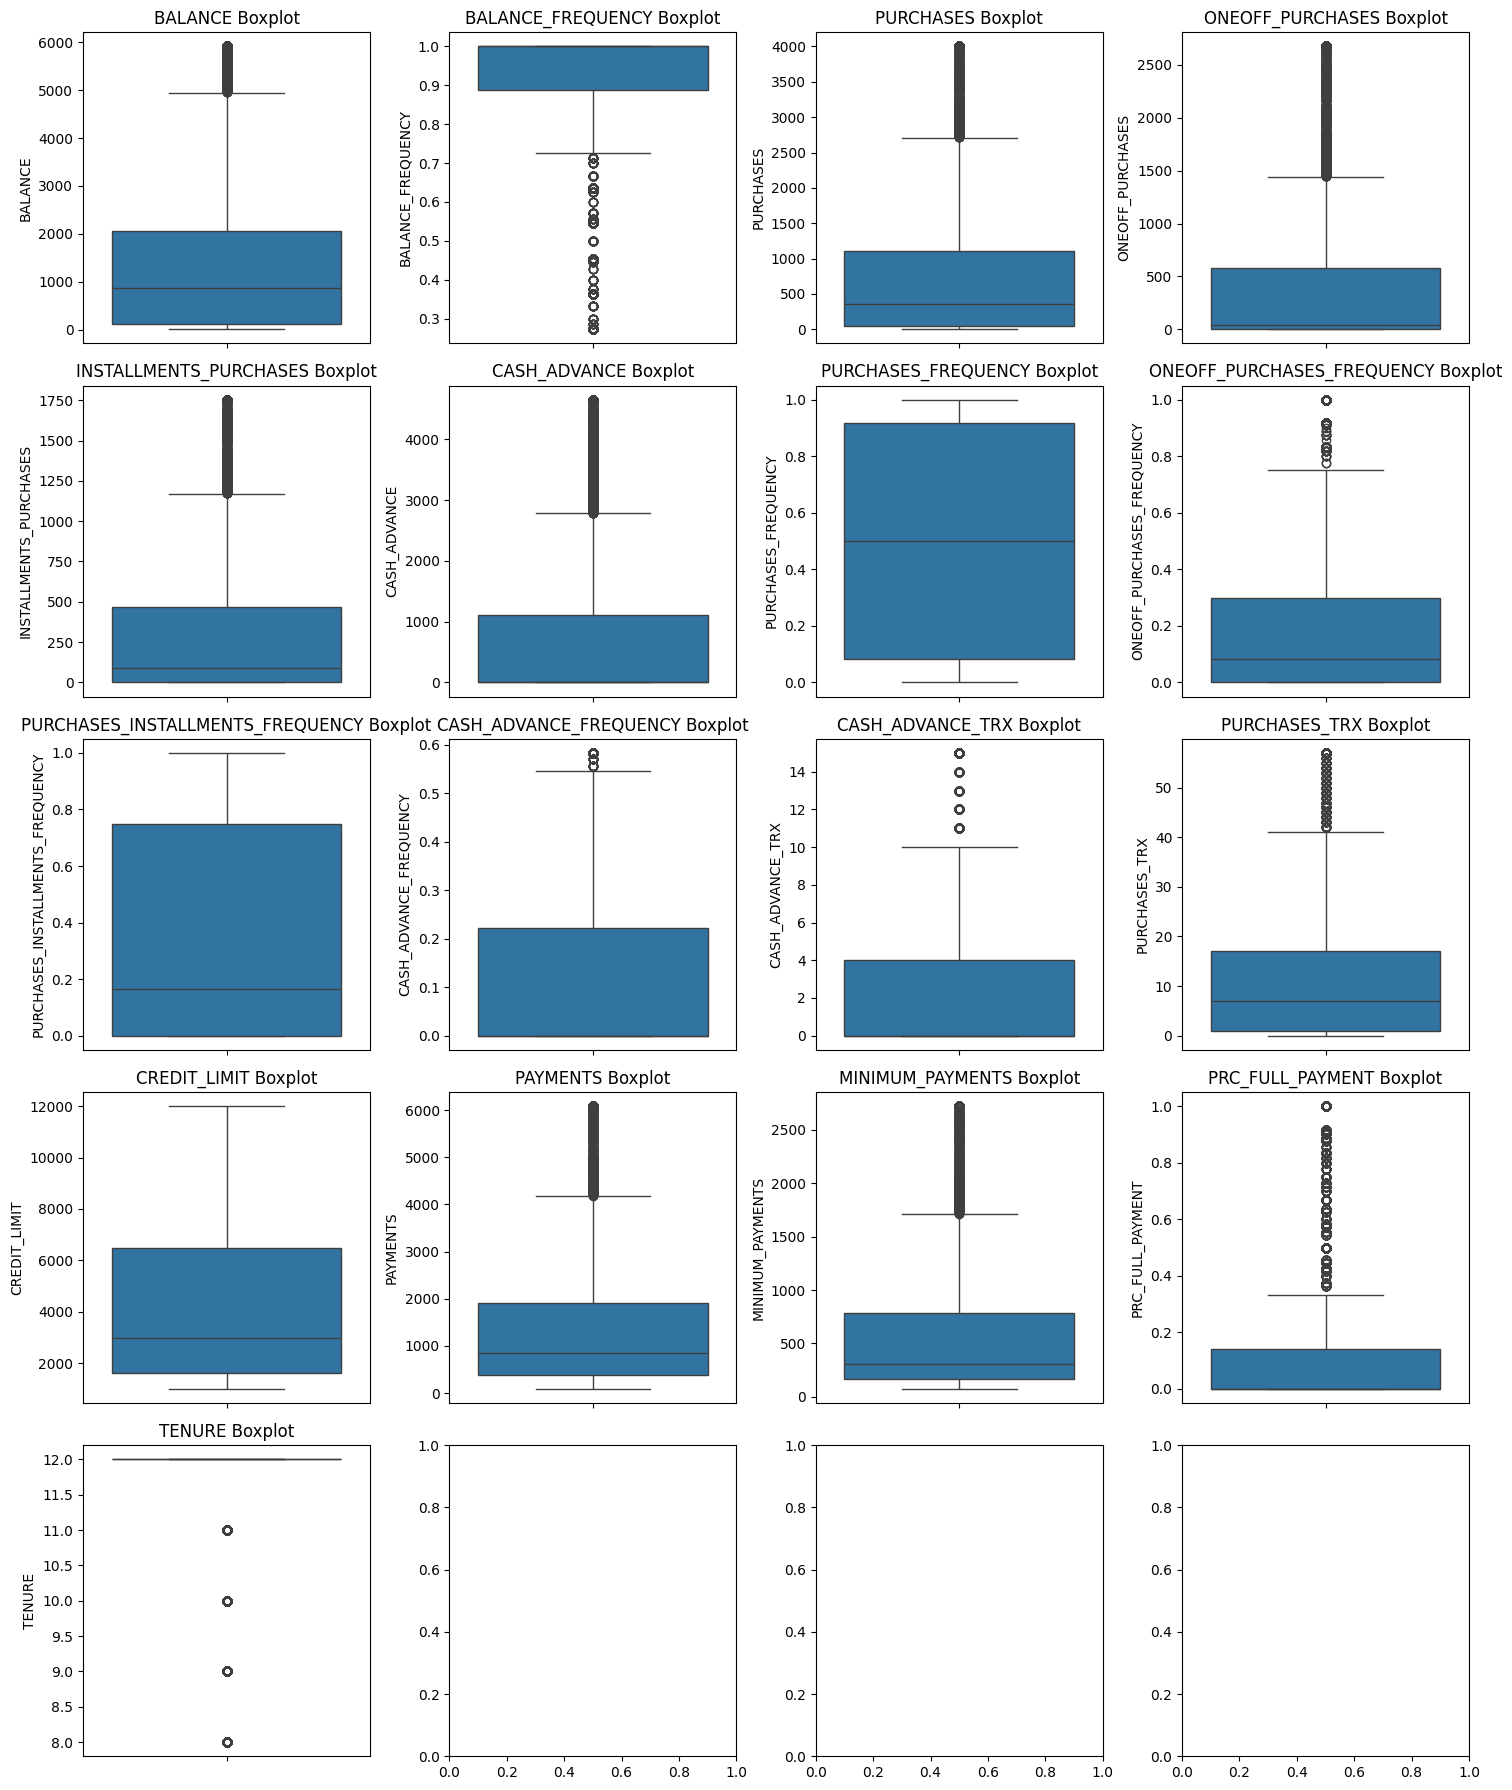

In [203]:
# Winsorize dataset to handle the outliers and cap extreme 5% values on both sides

from scipy.stats.mstats import winsorize

# Define the limits for winsorization
limits = 0.05

# Apply winsorization to each numerical column
for column in df.select_dtypes(include=np.number).columns:
  df[column] = winsorize(df[column], limits=limits)

# You can now visualize the boxplots again to see the effect of winsorization
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

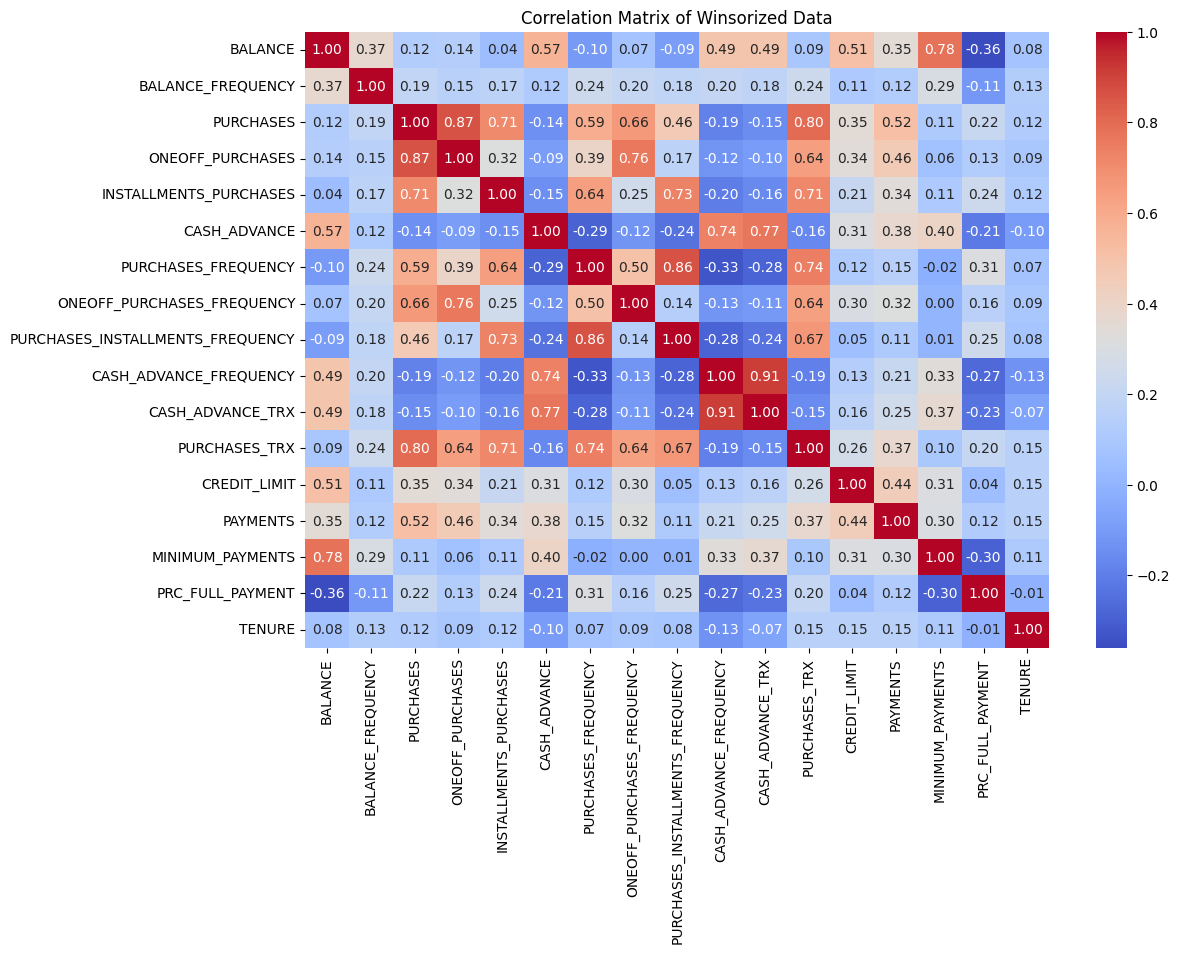

In [204]:
# Compute the correlation matrix of the Winsorized data
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Winsorized Data')
plt.show()

# **EDA**

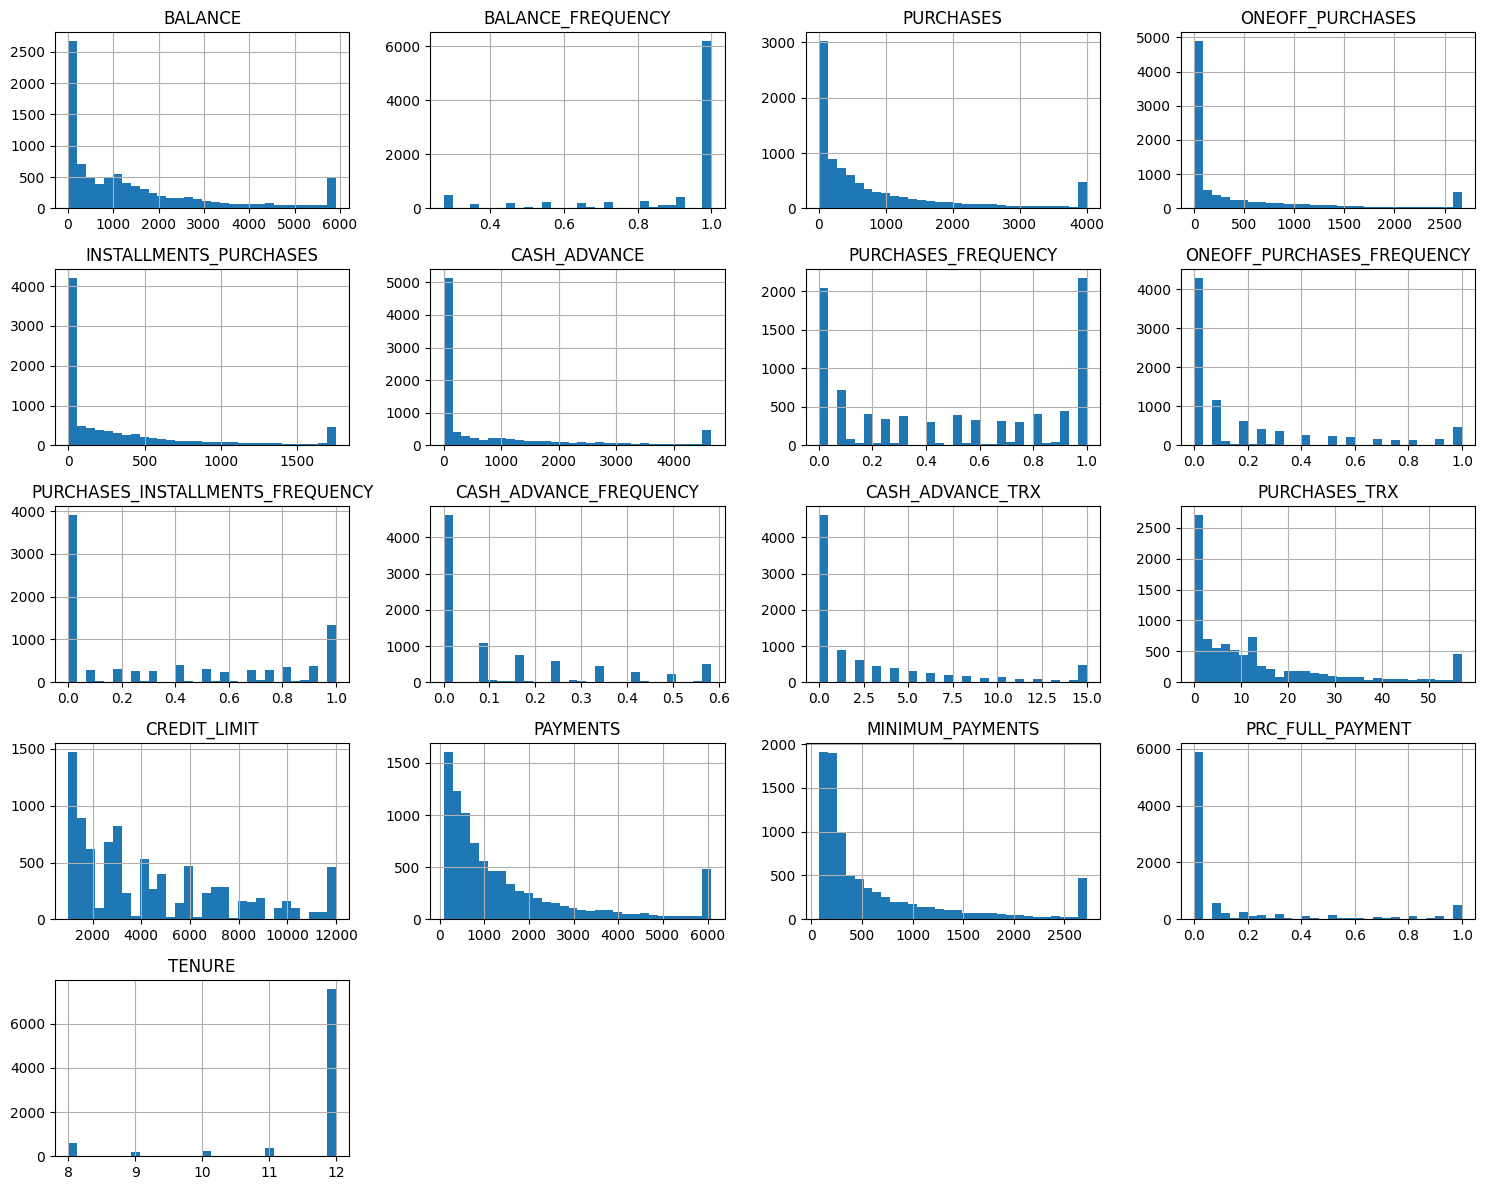

In [205]:
# Plot histograms for all columns
df.hist(bins=30, figsize=(15, 12), layout=(5, 4))
plt.tight_layout()
plt.show()

In [206]:
# Plot pairplot for selected variables to see pairwise relationships
#sns.pairplot(df)
#plt.show()

# Customer Behaviours Investigation

Purchasing Behaviour Relationships

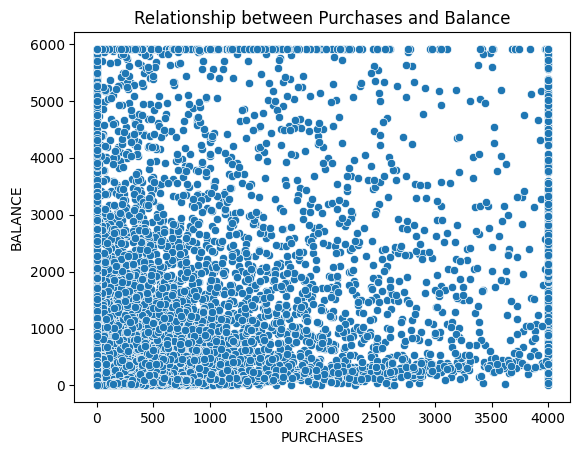

In [207]:
sns.scatterplot(x='PURCHASES', y='BALANCE', data=df)
plt.title('Relationship between Purchases and Balance')
plt.show()

Purchases vs Balance: Customers with lower purchases tend to have balances spread across a wide range, while those with high balances also show a diverse range of purchases, indicating no direct correlation between total spending and balance.

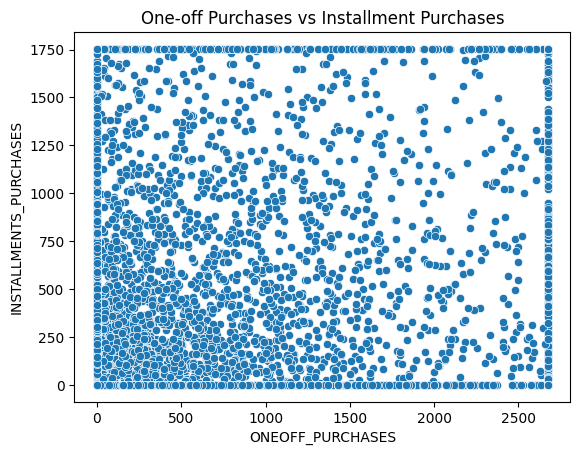

In [208]:
sns.scatterplot(x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', data=df)
plt.title('One-off Purchases vs Installment Purchases')
plt.show()

One-off Purchases vs Installment Purchases: Most customers appear to favor either one-off purchases or installment purchases rather than using both frequently, with fewer customers making large one-off purchases alongside frequent installment payments.

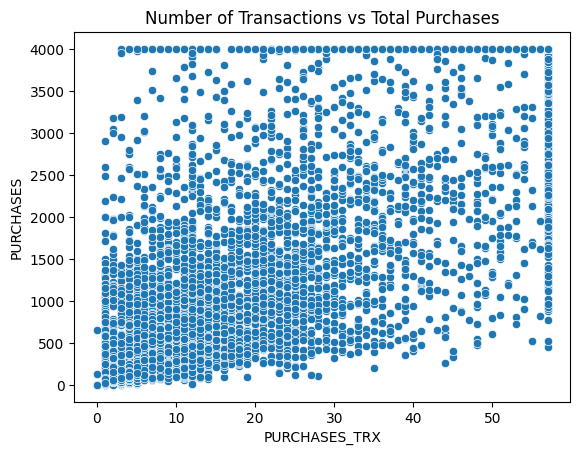

In [209]:
sns.scatterplot(x='PURCHASES_TRX', y='PURCHASES', data=df)
plt.title('Number of Transactions vs Total Purchases')
plt.show()

Number of Transactions vs Total Purchases: Customers with a higher number of transactions do not always correlate with higher total purchase amounts, suggesting that frequent transactions do not necessarily mean larger total spending.

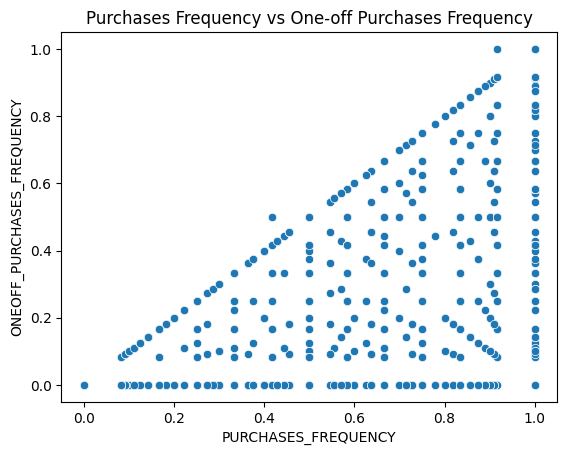

In [210]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df)
plt.title('Purchases Frequency vs One-off Purchases Frequency')
plt.show()

Purchases Frequency vs One-off Purchases Frequency: Customers with higher overall purchase frequencies still show variability in how often they make one-off purchases, indicating distinct purchasing patterns within frequent buyers.

**Credit Usage Relationships**

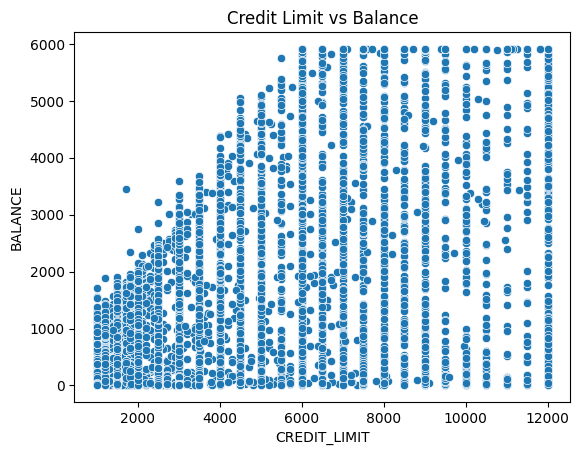

In [211]:
# Credit Limit vs Balance
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.title('Credit Limit vs Balance')
plt.show()

Credit Limit vs Balance: Customers with higher credit limits tend to have higher balances, but there's a wide range of balances across all credit limits, showing no strict relationship between limit and balance.

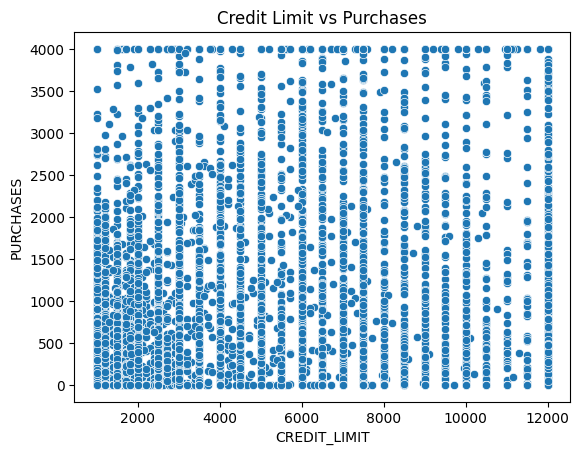

In [212]:
# Credit Limit vs Purchases
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', data=df)
plt.title('Credit Limit vs Purchases')
plt.show()

Credit Limit vs Purchases: The plot shows that customers with various credit limits make a wide range of purchases, indicating that credit limits do not strongly influence total purchase amounts.

**Cash Advance Behaviour**

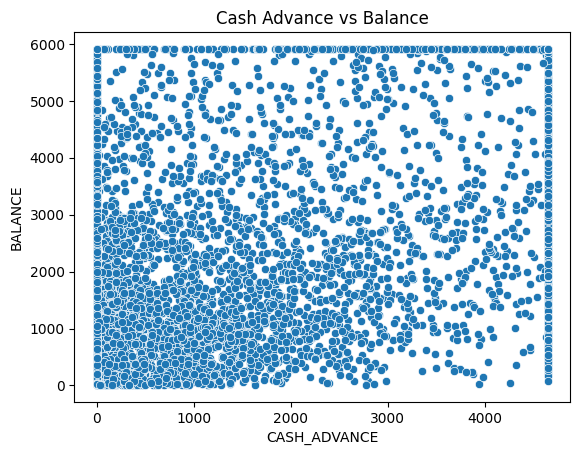

In [213]:
# Cash Advance vs Balance
sns.scatterplot(x='CASH_ADVANCE', y='BALANCE', data=df)
plt.title('Cash Advance vs Balance')
plt.show()

Cash Advance vs Balance: There is no clear relationship between cash advance amounts and balances, suggesting customers with both high and low balances use cash advances.

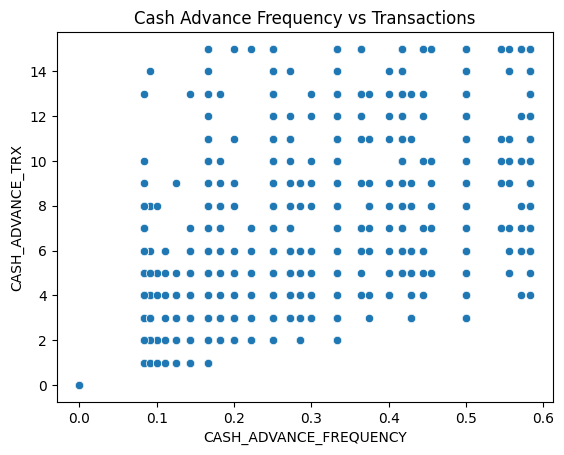

In [214]:
# Cash Advance Frequency vs Cash Advance Transactions
sns.scatterplot(x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', data=df)
plt.title('Cash Advance Frequency vs Transactions')
plt.show()

Cash Advance Frequency vs Transactions: Customers with higher cash advance frequency tend to make more transactions, although there are still a variety of behaviors across different levels of frequency.

**Payment Behaviour**

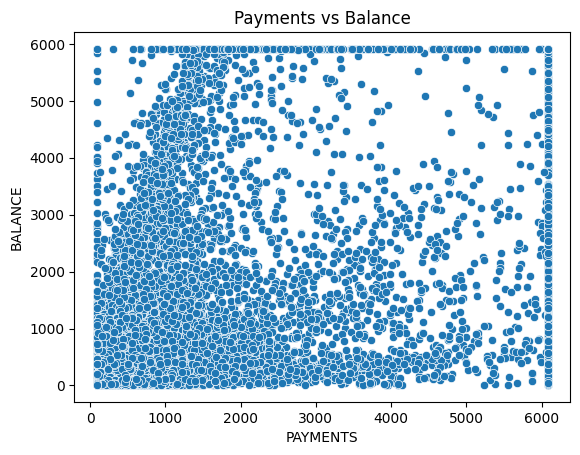

In [215]:
# Payments vs Balance
sns.scatterplot(x='PAYMENTS', y='BALANCE', data=df)
plt.title('Payments vs Balance')
plt.show()

Payments vs Balance: Higher payments are associated with a wide range of balances, suggesting that larger payments do not necessarily mean customers are paying off high balances.

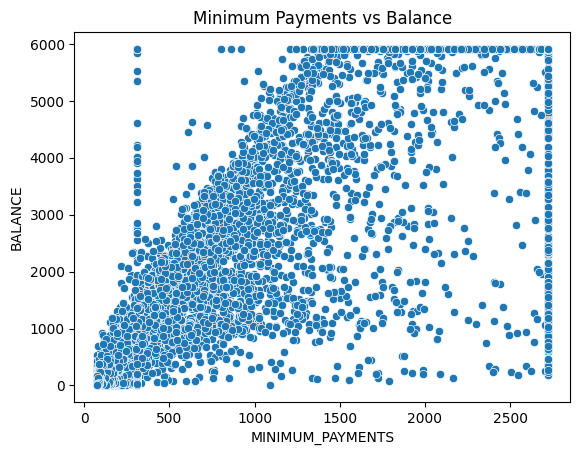

In [216]:
# Minimum Payments vs Balance
sns.scatterplot(x='MINIMUM_PAYMENTS', y='BALANCE', data=df)
plt.title('Minimum Payments vs Balance')
plt.show()

Minimum Payments vs Balance: Customers who make only minimum payments tend to have higher balances, indicating a risk of accumulating debt when not paying off more than the minimum amount.

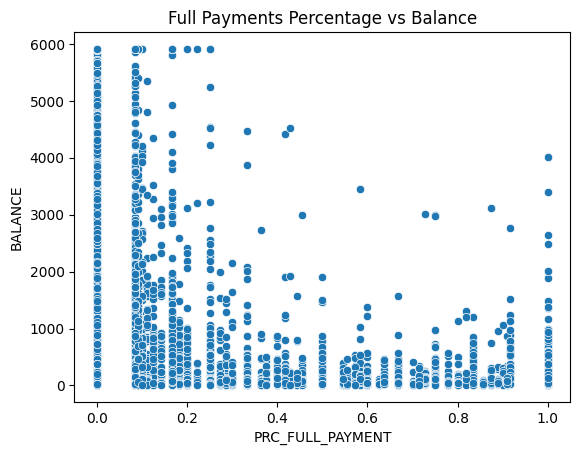

In [217]:
# Full Payments Percentage vs Balance
sns.scatterplot(x='PRC_FULL_PAYMENT', y='BALANCE', data=df)
plt.title('Full Payments Percentage vs Balance')
plt.show()

Full Payments Percentage vs Balance: Customers who make full payments tend to have lower balances, while those with low percentages of full payments have much higher balances.

**Customer Longevity**

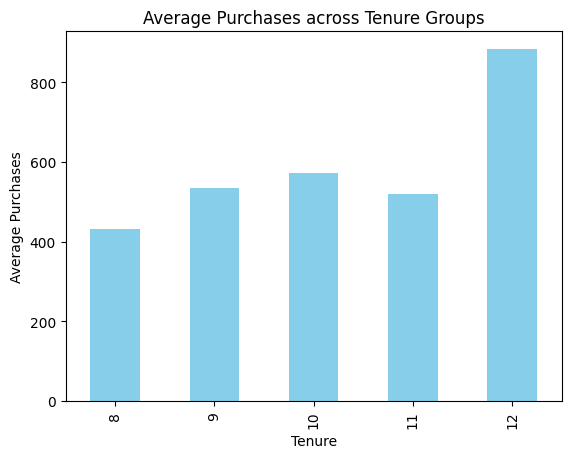

In [218]:
# Average Purchases across Tenure groups
df.groupby('TENURE')['PURCHASES'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Purchases across Tenure Groups')
plt.ylabel('Average Purchases')
plt.xlabel('Tenure')
plt.show()

Average Purchases across Tenure Groups: Customers with longer tenures (12 years) tend to make more purchases, with a steady increase in average purchases as tenure increases.

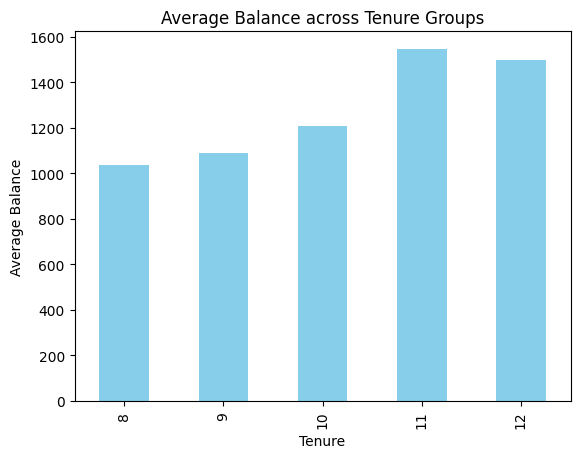

In [219]:
# Average Balance across Tenure groups
df.groupby('TENURE')['BALANCE'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Balance across Tenure Groups')
plt.ylabel('Average Balance')
plt.xlabel('Tenure')
plt.show()

Average Balance across Tenure Groups: Balances tend to increase as customer tenure grows, with customers who have been with the service for 11-12 years having the highest average balances.

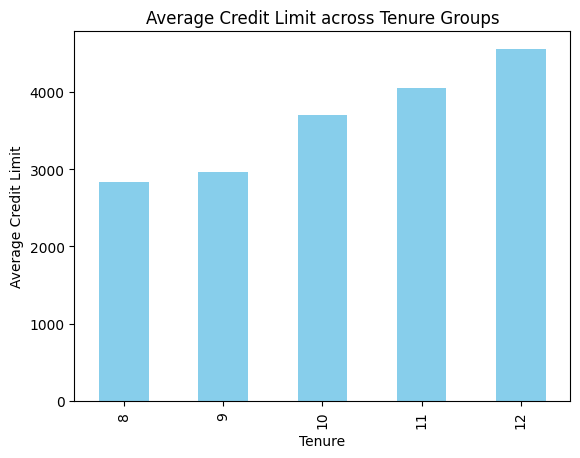

In [220]:
# Average Credit Limit across Tenure groups
df.groupby('TENURE')['CREDIT_LIMIT'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Credit Limit across Tenure Groups')
plt.ylabel('Average Credit Limit')
plt.xlabel('Tenure')
plt.show()

Average Credit Limit across Tenure Groups: Credit limits increase significantly as tenure grows, indicating that customers with longer tenure are trusted with higher credit limits.

Feature Importance to get a rough sense as to which features contribute most to variance

In [221]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [222]:
# Random forest for feature importance (use a dummy target)
dummy_target = np.random.randint(0, 3, size=df.shape[0])
rf = RandomForestClassifier(random_state=42)
rf.fit(df, dummy_target)

RandomForestClassifier(random_state=42)

In [223]:
# Get feature importances
importances = rf.feature_importances_

In [224]:
# Create a dataframe of feature importances
importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': importances})

In [225]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

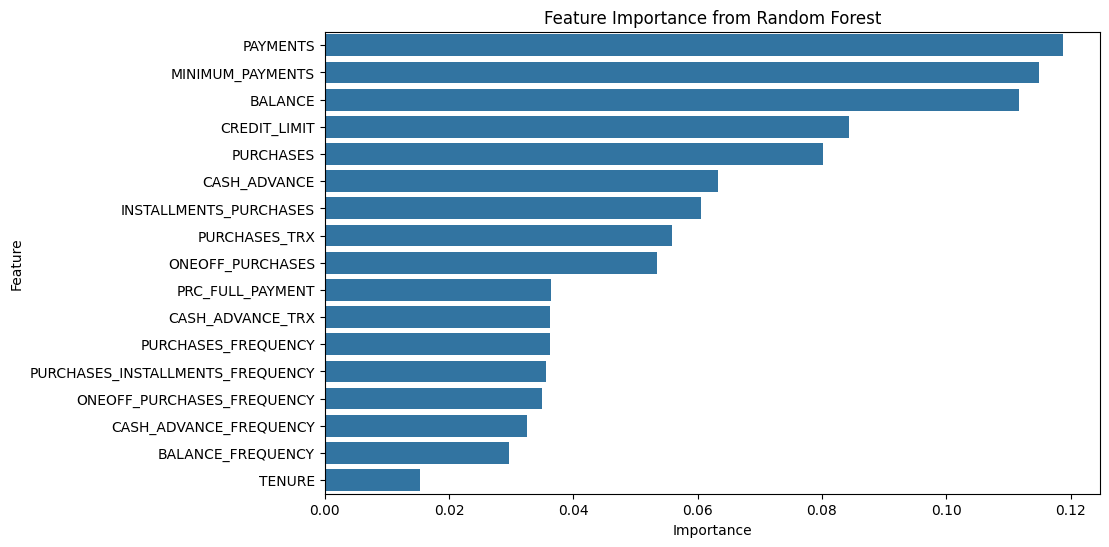

In [226]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Data Preprocessing

In [227]:
# Select the most relevant features from the original dataset
selected_features = ['PAYMENTS', 'BALANCE', 'CREDIT_LIMIT',
                     'PURCHASES', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES']

In [228]:
df_selected = df[selected_features]

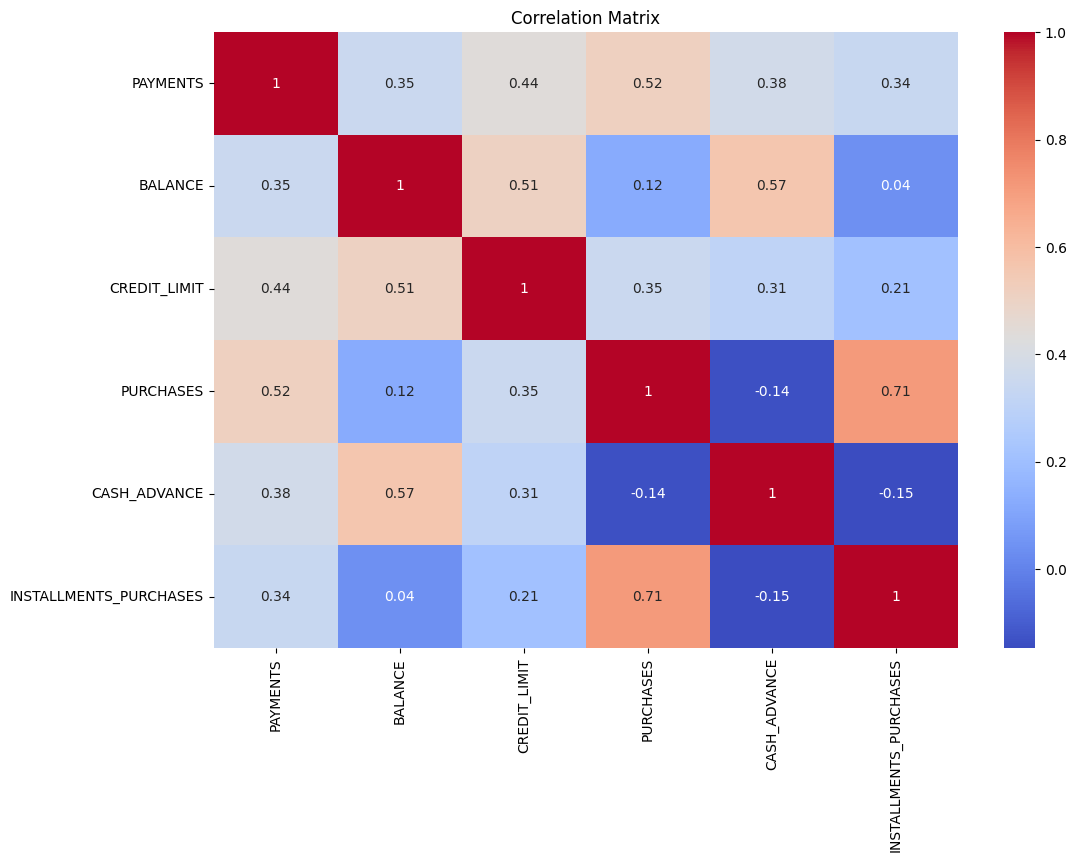

In [229]:
corr_matrix = df_selected.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [230]:
# Create new features
df_selected['BALANCE_TO_CREDIT_RATIO'] = df_selected['BALANCE'] / df_selected['CREDIT_LIMIT']
df_selected['PAYMENTS_TO_PURCHASES_RATIO'] = df_selected['PAYMENTS'] / df_selected['PURCHASES']

<ipython-input-230-1622e81cdd97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BALANCE_TO_CREDIT_RATIO'] = df_selected['BALANCE'] / df_selected['CREDIT_LIMIT']
<ipython-input-230-1622e81cdd97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PAYMENTS_TO_PURCHASES_RATIO'] = df_selected['PAYMENTS'] / df_selected['PURCHASES']


In [231]:
df_selected.head()

PAYMENTS      BALANCE  CREDIT_LIMIT  PURCHASES  CASH_ADVANCE  \
CUST_ID                                                                    
C10001    201.802084    40.900749        1000.0      95.40      0.000000   
C10002   4103.032597  3202.467416        7000.0       0.00   4653.693195   
C10003    622.066742  2495.148862        7500.0     773.17      0.000000   
C10004     90.071100  1666.670542        7500.0    1499.00    205.788017   
C10005    678.334763   817.714335        1200.0      16.00      0.000000   

         INSTALLMENTS_PURCHASES  BALANCE_TO_CREDIT_RATIO  \
CUST_ID                                                    
C10001                     95.4                 0.040901   
C10002                      0.0                 0.457495   
C10003                      0.0                 0.332687   
C10004                      0.0                 0.222223   
C10005                      0.0                 0.681429   

         PAYMENTS_TO_PURCHASES_RATIO  
CUST_ID                               
C10001                      2.115326  
C10002                           inf  
C10003                      0.804567  
C10004                      0.060087  
C10005                     42.395923

In [232]:
# Replace inf and -inf with NaN
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_selected.dropna(inplace=True)

<ipython-input-232-943eb491b3ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-232-943eb491b3ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


In [233]:
# Update selected_features to include the new features
selected_features = selected_features + ['BALANCE_TO_CREDIT_RATIO', 'PAYMENTS_TO_PURCHASES_RATIO']

Scale Data

In [234]:
# Initialize Scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

In [235]:
df_scaled.head()

PAYMENTS   BALANCE  CREDIT_LIMIT  PURCHASES  CASH_ADVANCE  \
0  0.018642  0.005437      0.000000   0.023848       0.00000   
1  0.088764  0.421221      0.590909   0.193294       0.00000   
2  0.000000  0.280865      0.590909   0.374756       0.04422   
3  0.098153  0.137040      0.018182   0.003998       0.00000   
4  0.218573  0.305118      0.072727   0.333325       0.00000   

   INSTALLMENTS_PURCHASES  BALANCE_TO_CREDIT_RATIO  \
0                0.054419                 0.019759   
1                0.000000                 0.163294   
2                0.000000                 0.108955   
3                0.000000                 0.334848   
4                0.760536                 0.494246   

   PAYMENTS_TO_PURCHASES_RATIO  
0                 5.202831e-06  
1                 1.944214e-06  
2                 9.339911e-08  
3                 1.053425e-04  
4                 2.554586e-06

**Principal Component Analysis (PCA)**

In [236]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)

# Fit PCA on the scaled dataset and transform it
df_pca = pca.fit_transform(df_scaled)

# Convert PCA output back into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [237]:
df_pca.head()

PC1       PC2
0 -0.550049 -0.061404
1 -0.032747  0.249078
2 -0.031905  0.123653
3 -0.470168  0.109299
4  0.154540 -0.278721

# **Clustering Algorithms**

# K-Means Clustering

**Elbow Method**

In [238]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

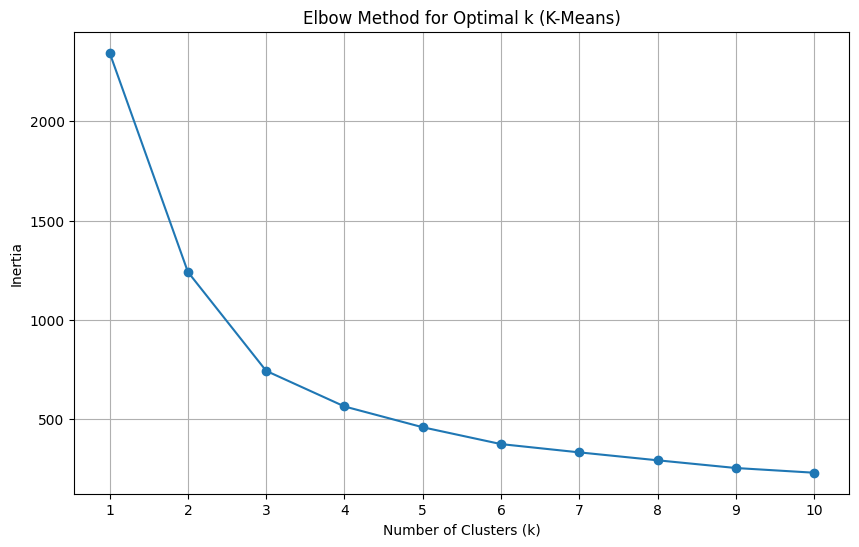

In [239]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

Optimal number of clusters based on the elbow method is 3

In [240]:
optimal_k = 3

In [241]:
# Run K-means clustering model and fit it
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

In [242]:
# K-means Silhouette Score
kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

Silhouette Score for K-Means: 0.562886659921206


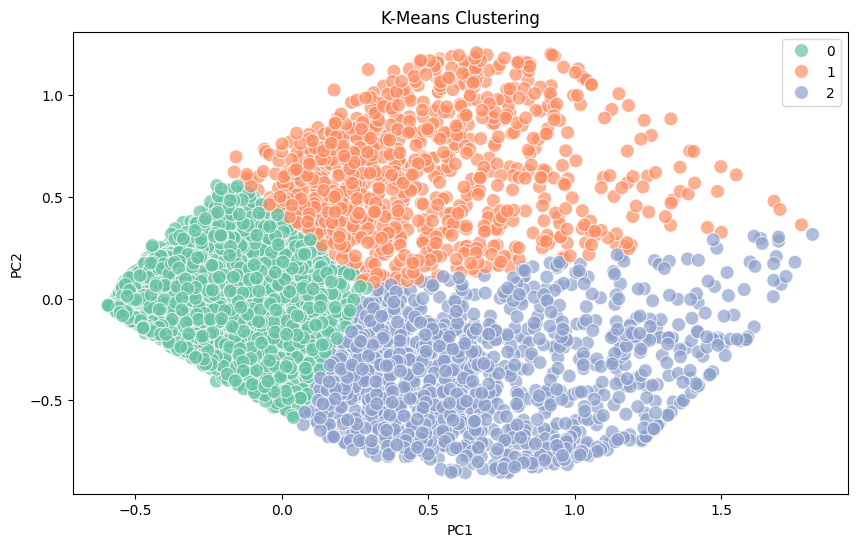

In [243]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('K-Means Clustering')
plt.show()

# Gaussian Mixture Model

In [244]:
# GMM Clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)

In [245]:
# GMM Silhouette Score
gmm_silhouette = silhouette_score(df_pca, gmm_labels)
print(f'Silhouette Score for GMM: {gmm_silhouette}')

Silhouette Score for GMM: 0.4992899099426523


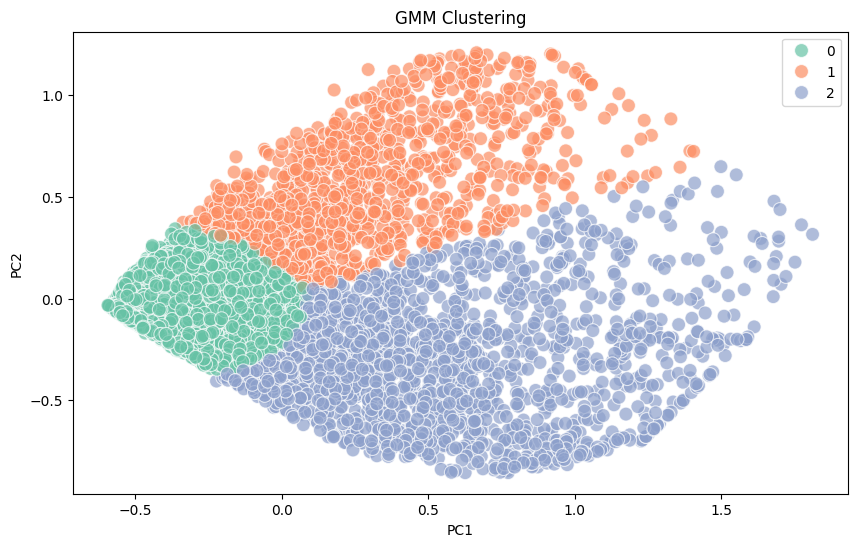

In [246]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=gmm_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('GMM Clustering')
plt.show()

# Hierarchial Clustering

In [247]:
# Clustering with Ward linkage
hierarchical_ward = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_ward_labels = hierarchical_ward.fit_predict(df_pca)

In [248]:
# Silhouette Score
ward_silhouette = silhouette_score(df_pca, hierarchical_ward_labels)
print(f'Silhouette Score for Hierarchical Clustering (Ward Linkage): {ward_silhouette}')

Silhouette Score for Hierarchical Clustering (Ward Linkage): 0.5604075895488367


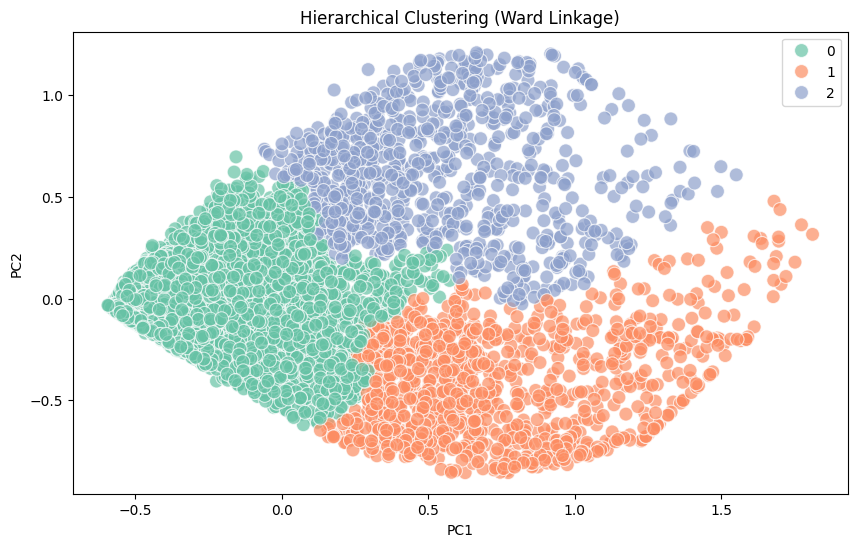

In [249]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=hierarchical_ward_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.show()

In [250]:
# Clustering with Complete linkage
hierarchical_complete = AgglomerativeClustering(n_clusters=optimal_k, linkage='complete')
hierarchical_complete_labels = hierarchical_complete.fit_predict(df_pca)

In [251]:
# Silhouette Score
complete_silhouette = silhouette_score(df_pca, hierarchical_complete_labels)
print(f'Silhouette Score for Hierarchical Clustering (Complete Linkage): {complete_silhouette}')


Silhouette Score for Hierarchical Clustering (Complete Linkage): 0.5117966995508012


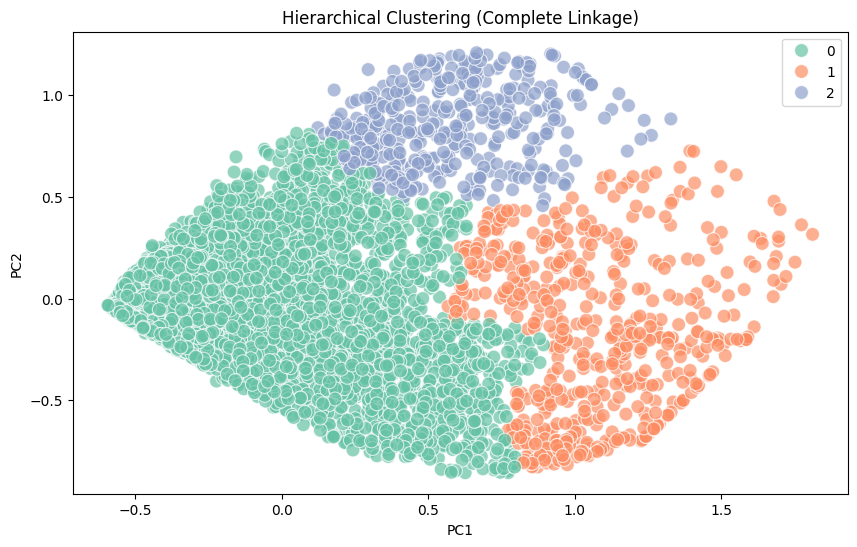

In [252]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=hierarchical_complete_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('Hierarchical Clustering (Complete Linkage)')
plt.show()

In [253]:
# Clustering with Average linkage
hierarchical_average = AgglomerativeClustering(n_clusters=optimal_k, linkage='average')
hierarchical_average_labels = hierarchical_average.fit_predict(df_pca)

In [254]:
# Silhouette Score
average_silhouette = silhouette_score(df_pca, hierarchical_average_labels)
print(f'Silhouette Score for Hierarchical Clustering (Average Linkage): {average_silhouette}')

Silhouette Score for Hierarchical Clustering (Average Linkage): 0.483275766743825


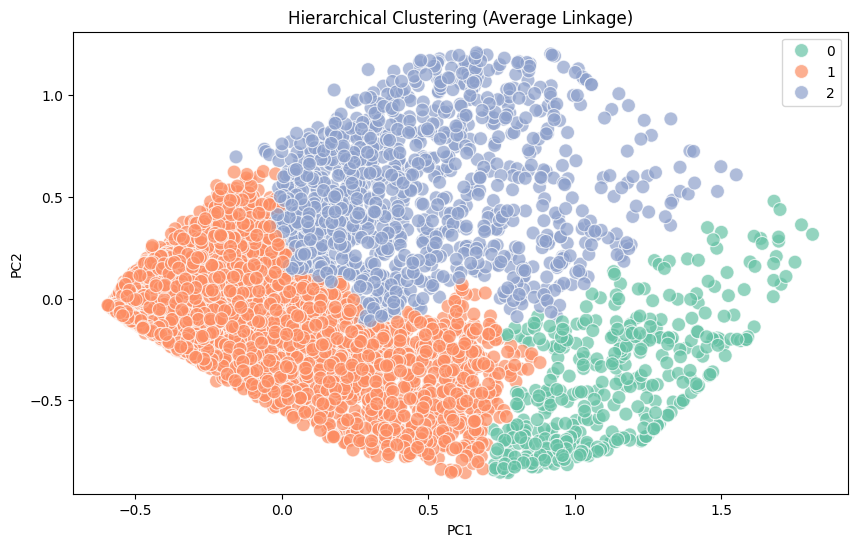

In [255]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=hierarchical_average_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('Hierarchical Clustering (Average Linkage)')
plt.show()

Dendrogram using ward as it has the highest silhouette score

In [256]:
# Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Use linkage method to generate the hierarchical linkage matrix
#linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
#plt.figure(figsize=(12, 8))
#dendrogram(linkage_matrix)
#plt.title('Dendrogram (Ward Linkage)')
#plt.xlabel('Sample Index')
#plt.ylabel('Distance')
#plt.show()

# DBSCAN Clustering

wanted to test this cluster model with my codes

In [257]:
from sklearn.neighbors import NearestNeighbors

In [258]:
# Set min_samples
min_samples = 5

In [259]:
# Calculate the distance to the min_samples-th nearest neighbor for each point
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

In [260]:
# Sort the distances for each point in ascending order
distances = np.sort(distances[:, min_samples - 1], axis=0)

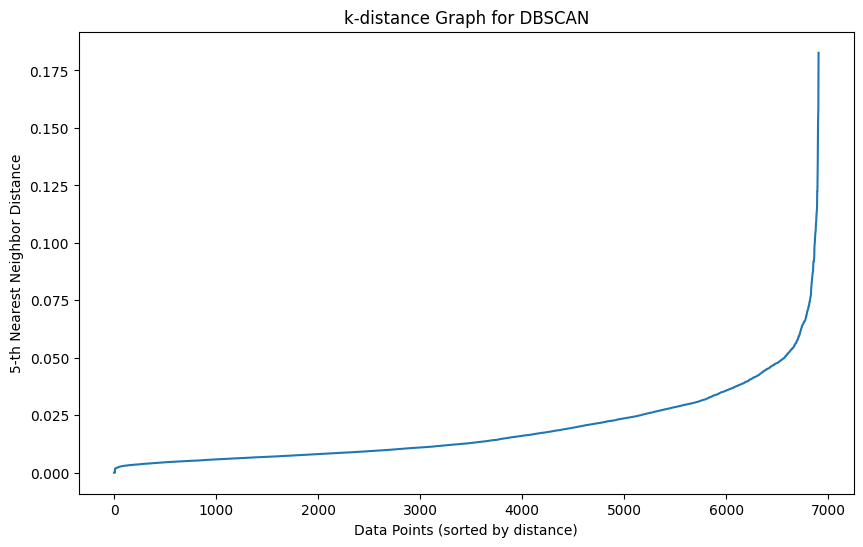

In [261]:
# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()

In [343]:
# Clustering with DBSCAN ith the identified eps value
optimal_eps = 0.07
dbscan = DBSCAN(eps=optimal_eps, min_samples=20)
dbscan_labels = dbscan.fit_predict(df_pca)

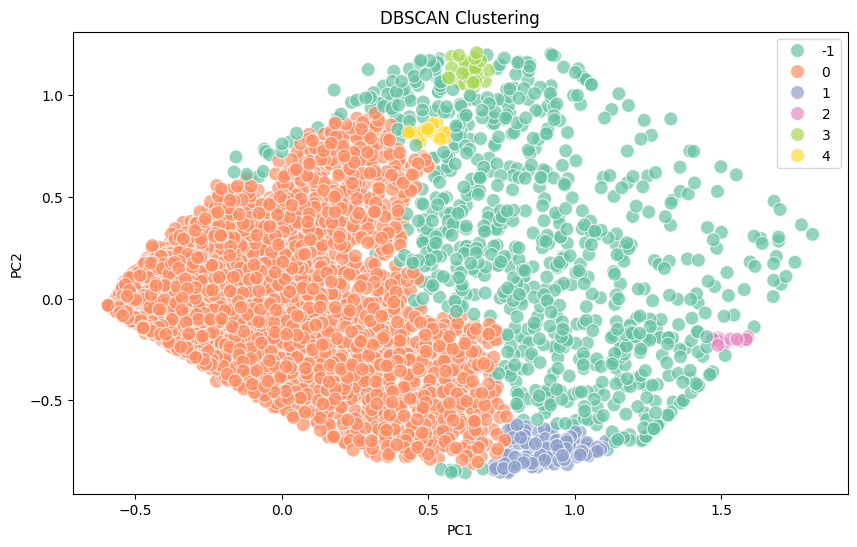

In [344]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=dbscan_labels, palette='Set2', s=100, alpha=0.7, data=df_pca)
plt.title('DBSCAN Clustering')
plt.show()

In [345]:
# Remove noise points (-1) from the labels and data before calculating silhouette score
# Only calculate silhouette score if there are more than 1 cluster formed
if len(set(dbscan_labels)) > 1:  # Check if more than 1 cluster is formed
    silhouette_avg = silhouette_score(df_pca[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score for DBSCAN with eps={optimal_eps}: {silhouette_avg}")
else:
    print("DBSCAN did not form valid clusters (too many noise points or not enough clusters).")

Silhouette Score for DBSCAN with eps=0.07: 0.45403780711517117
